<a href="https://colab.research.google.com/github/hazelkozlu/CoreDemo/blob/master/onerilentez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#google drive bağlantısı için
from  google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Colab Notebooks/

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks


4.8.0
Toplam artırılmış veri sayısı: 10538
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (D

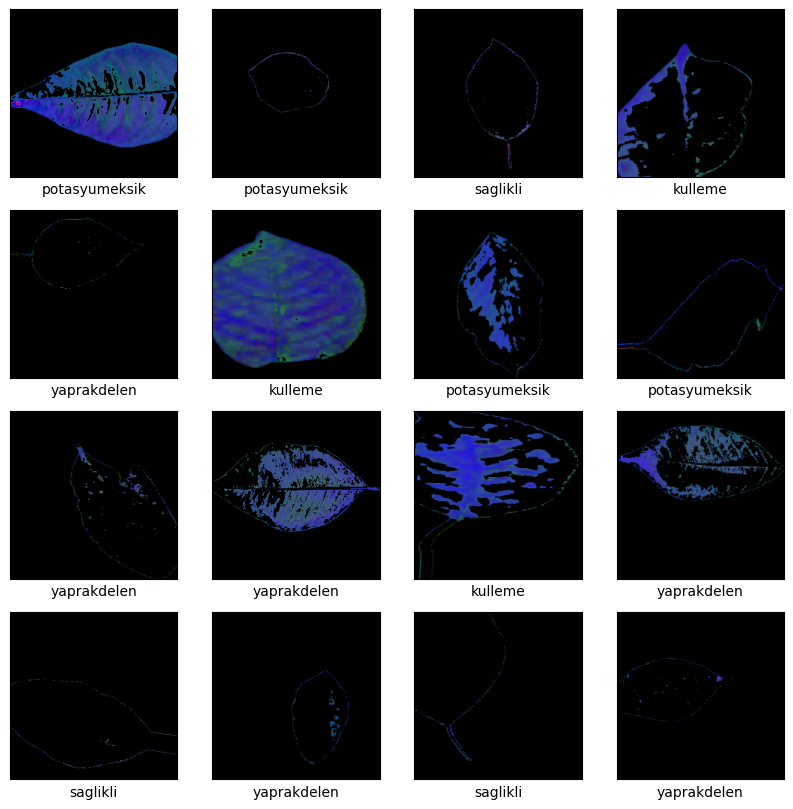

Epoch 1/30
143/143 [==============================] - 126s 790ms/step - loss: 0.8966 - accuracy: 0.5933 - val_loss: 0.6855 - val_accuracy: 0.7335
Epoch 2/30
143/143 [==============================] - 113s 788ms/step - loss: 0.5955 - accuracy: 0.7536 - val_loss: 0.5526 - val_accuracy: 0.7795
Epoch 3/30
143/143 [==============================] - 112s 786ms/step - loss: 0.5455 - accuracy: 0.7770 - val_loss: 0.4933 - val_accuracy: 0.8013
Epoch 4/30
143/143 [==============================] - 113s 792ms/step - loss: 0.5134 - accuracy: 0.7903 - val_loss: 0.5364 - val_accuracy: 0.7759
Epoch 5/30
143/143 [==============================] - 114s 799ms/step - loss: 0.4757 - accuracy: 0.8071 - val_loss: 0.5827 - val_accuracy: 0.7692
Epoch 6/30
143/143 [==============================] - 113s 793ms/step - loss: 0.4682 - accuracy: 0.8094 - val_loss: 0.5492 - val_accuracy: 0.7688
Epoch 7/30
143/143 [==============================] - 114s 795ms/step - loss: 0.4596 - accuracy: 0.8119 - val_loss: 0.4680 -

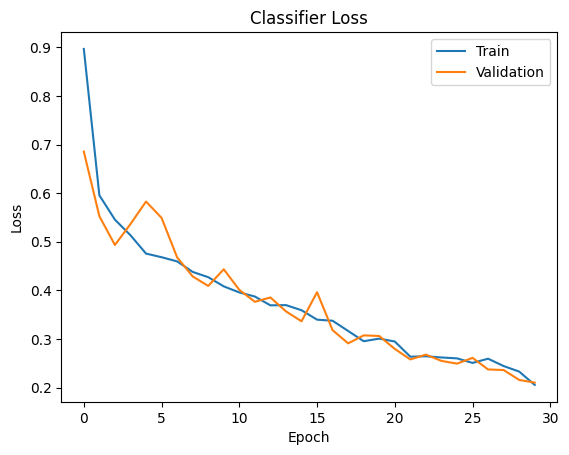

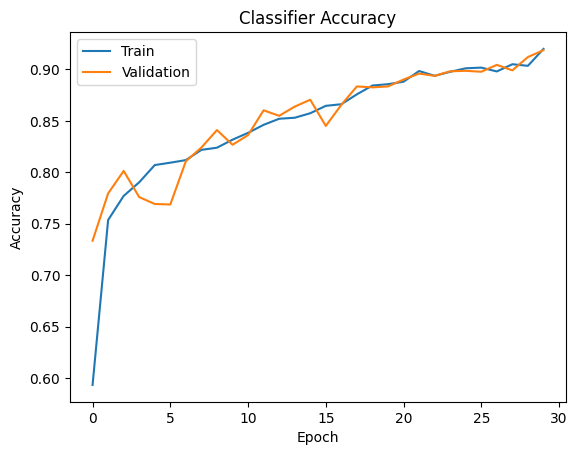

30/30 [==============================] - 1s 15ms/step


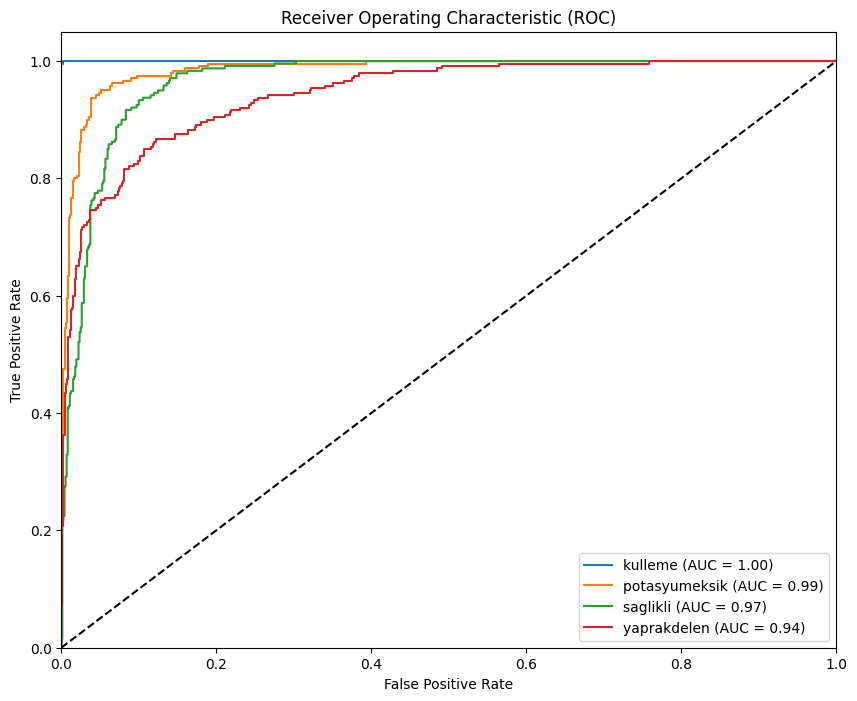

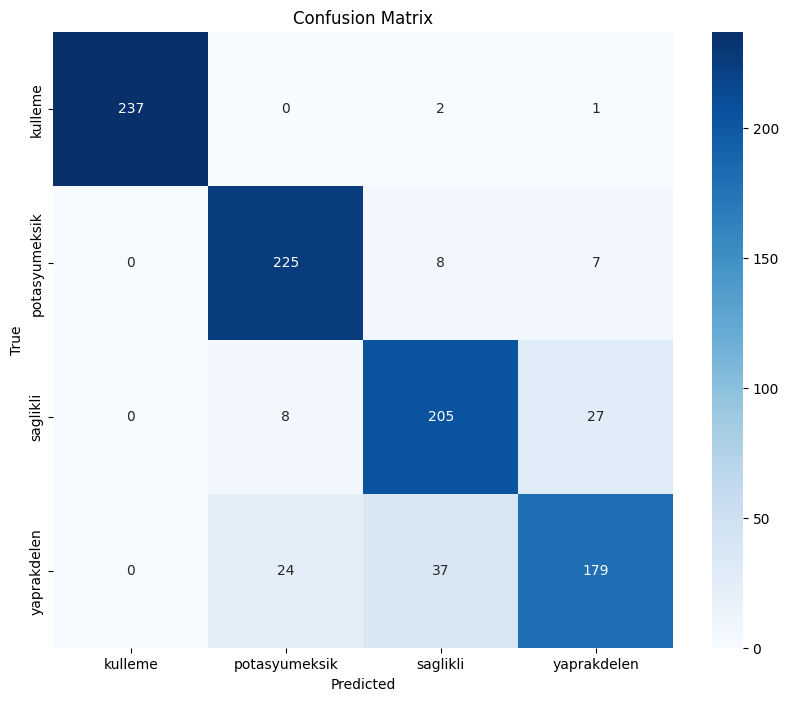

30/30 [==============================] - 0s 15ms/step
               precision    recall  f1-score   support

      kulleme       1.00      0.99      0.99       240
potasyumeksik       0.88      0.94      0.91       240
     saglikli       0.81      0.85      0.83       240
  yaprakdelen       0.84      0.75      0.79       240

     accuracy                           0.88       960
    macro avg       0.88      0.88      0.88       960
 weighted avg       0.88      0.88      0.88       960



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 30 14:20:23 2023

@author: hazel
"""
import cv2
print(cv2.__version__)

import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from sklearn.metrics import roc_curve, auc, confusion_matrix
from keras.utils import to_categorical


from sklearn.model_selection import train_test_split
DATASET = 'TezVeriSeti/train'
DATASET2 = 'TezVeriSeti/valid'
CATEGORIES = ["kulleme", "potasyumeksik", "saglikli", "yaprakdelen"]
# Veri artırma parametreleri
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Veri kümesini yükleme ve veri artırma
train_data = []
test_data = []

for category in CATEGORIES:
    label = CATEGORIES.index(category)

    # Eğitim veri kümesi
    train_path = os.path.join(DATASET, category)
    train_images = os.listdir(train_path)
    for img_file in train_images:
        img = cv.imread(os.path.join(train_path, img_file), 1)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)  # Görüntüyü HSV renk uzayına dönüştür
        img = cv.resize(img_hsv, (224, 224))  # Yeniden boyutlandırılmış HSV görüntüyü kullan
        train_data.append([img, label])

    # Test veri kümesi
    test_path = os.path.join(DATASET2, category)
    test_images = os.listdir(test_path)
    for img_file in test_images:
        img = cv.imread(os.path.join(test_path, img_file), 1)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)  # Görüntüyü HSV renk uzayına dönüştür
        img = cv.resize(img_hsv, (224, 224))  # Yeniden boyutlandırılmış HSV görüntüyü kullan
        test_data.append([img, label])
# Kahverengi leke vurgulama işlemi

def vurgula_hasarli_bolgeler(img):
    img_yuv = cv.cvtColor(img, cv.COLOR_BGR2YUV)  # Görüntüyü YUV renk uzayına çevir

    lower_green = np.array([20, 50, 50])  # YUV renk aralığının alt sınırları
    upper_green = np.array([100, 255, 255])  # YUV renk aralığının üst sınırları
    mask = cv.inRange(img_yuv, lower_green, upper_green)  # Renk aralığı maskesi oluştur
    result = cv.bitwise_and(img, img, mask=mask)  # Maskelenmiş görüntüyü al

    return result

# Kahverengi lekeleri vurgula ve görüntüleri güncelle
for i in range(len(train_data)):
    train_data[i][0] = vurgula_hasarli_bolgeler(train_data[i][0])

for i in range(len(test_data)):
    test_data[i][0] = vurgula_hasarli_bolgeler(test_data[i][0])
# Veri artırma işlemi
augmented_data = []
for x, y in train_data:
    x = x.reshape((1,) + x.shape) # Reshape the image
    i = 0
    for x_batch in datagen.flow(x, batch_size=1): # Generate augmented images
        augmented_data.append([x_batch[0], y]) # Append the image and the label
        i += 1
        if i > 10: # Limit the number of augmented images per original image
            break

train_data = train_data + augmented_data # Concatenate the original and augmented data
augmented_data_count = len(augmented_data)
print("Toplam artırılmış veri sayısı:", augmented_data_count)

# Karıştırma işlemi
random.shuffle(train_data)
random.shuffle(test_data)

X_train = []
y_train = []

for features, label in train_data:
    X_train.append(features)
    y_train.append(label)

X_test = []
y_test = []

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

# Verileri numpy dizisine dönüştürme
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Verileri normalleştirme
X_train = X_train / 255.0
X_test = X_test / 255.0

num_classes = len(CATEGORIES)
# Etiketleri kategorik hale getirme
y_train_cat = to_categorical(y_train,num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)
# Verileri eğitim ve doğrulama setlerine ayırma
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_train,
                                                                  y_train_cat,
                                                                  test_size=0.2,
                                                                  random_state=42)

# Model oluşturma ve eğitim
num_classes = len(CATEGORIES)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()

#from tensorflow.keras.optimizers import RMSprop

#optimizer = RMSprop(learning_rate=learning_rate)

#model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
batch_size = 64
target_augmented_samples = len(X_train_new)  # Hedef artırılmış veri sayısı
current_augmented_samples = 0


# Veri kümesindeki her sınıftan örnek görüntüleri gösterme
plt.figure(figsize=(10, 10))
for i in range(4):
    for j in range(4):
        index = i * 4 + j
        plt.subplot(4, 4, index + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train_new[index], cmap=plt.cm.binary)
        plt.xlabel(CATEGORIES[np.argmax(y_train_new[index])])
plt.show()
steps_per_epoch = target_augmented_samples // batch_size
validation_steps = len(X_val_new) // batch_size

train_datagen = datagen.flow(X_train_new, y_train_new, batch_size=batch_size)
val_datagen = datagen.flow(X_val_new, y_val_new, batch_size=batch_size)

hist = model.fit(
    train_datagen,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=val_datagen,
    validation_steps=validation_steps
)

# ... (Test sonuçlarını değerlendirme ve grafiği çizme kısmı aynı kalır)
# Test sonuçlarını değerlendirme
test_loss, test_acc = model.evaluate(X_test, to_categorical(y_test))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Loss grafiği
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Accuracy grafiği
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# ROC eğrileri çizdirme
y_prob = model.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'{CATEGORIES[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Confusion matrixi görselleştirme
y_pred = np.argmax(y_prob, axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import classification_report

# Modelin tahminlerini elde etme
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

# Sınıflandırma raporunu oluşturma
class_names = CATEGORIES
report = classification_report(np.argmax(y_test_cat, axis=1), y_pred, target_names=class_names)

# Raporu yazdırma
print(report)
# Modeli kaydet
model.save("hazel_model2.h5")

In [4]:
import psutil

# Mevcut CPU kullanımı
cpu_percent = psutil.cpu_percent(interval=1)
print(f"CPU Kullanımı: {cpu_percent}%")

# Mevcut RAM kullanımı
ram_info = psutil.virtual_memory()
print(f"Toplam RAM: {ram_info.total / (1024 ** 3):.2f} GB")
print(f"Kullanılan RAM: {ram_info.used / (1024 ** 3):.2f} GB")
print(f"Boş RAM: {ram_info.available / (1024 ** 3):.2f} GB")


CPU Kullanımı: 0.8%
Toplam RAM: 51.00 GB
Kullanılan RAM: 25.17 GB
Boş RAM: 25.24 GB
